In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import sklearn.tree as tree
from sklearn import metrics
import tensorflow as tf

import os
import shutil
import pickle as pk

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [2]:
train_df = pd.read_csv('../data/train.csv', delimiter=",")
new_df = pd.read_csv('../data/test.csv', delimiter=",")
new_df = new_df.iloc[:,1:]
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train_df.shape

(2000, 21)

In [4]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
(train_df.isnull().sum() / train_df.shape[0] * 100.00)

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

## Data Visualization

In [9]:
plt.style.use('fivethirtyeight')

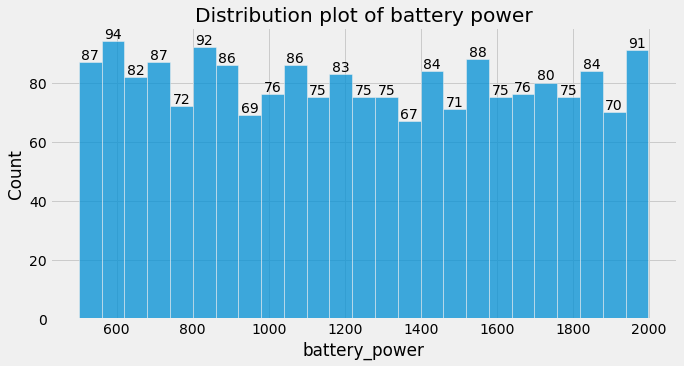

In [10]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['battery_power'] , bins = 25)
g.bar_label(g.containers[1])
plt.title('Distribution plot of battery power')
plt.show()

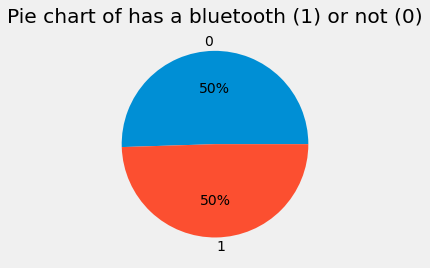

In [11]:
plt.pie(train_df['blue'].value_counts(), labels=train_df['blue'].unique(), autopct='%.0f%%')
plt.title('Pie chart of has a bluetooth (1) or not (0)')
plt.show()

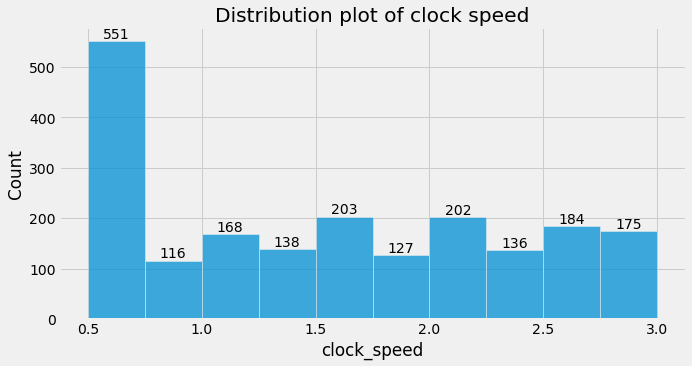

In [12]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['clock_speed'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of clock speed')
plt.show()

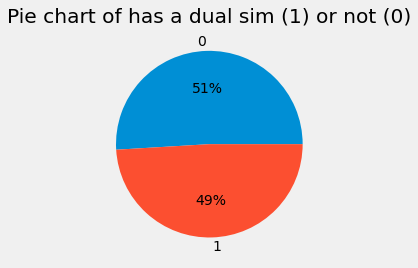

In [13]:
plt.pie(train_df['dual_sim'].value_counts(), labels=train_df['dual_sim'].unique(), autopct='%.0f%%')
plt.title('Pie chart of has a dual sim (1) or not (0)')
plt.show()

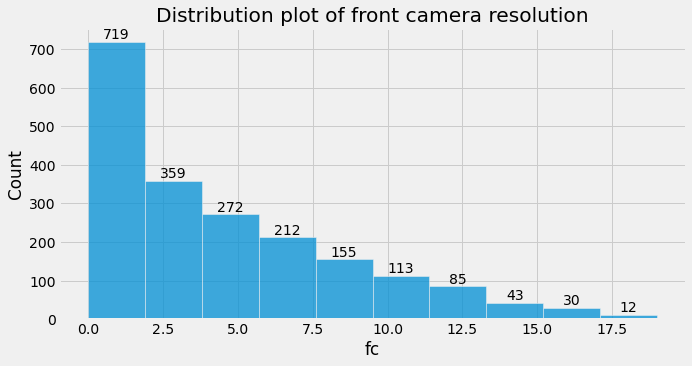

In [14]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['fc'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of front camera resolution')
plt.show()

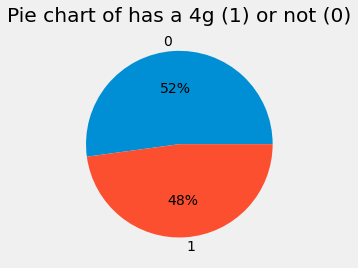

In [15]:
plt.pie(train_df['four_g'].value_counts(), labels=train_df['four_g'].unique(), autopct='%.0f%%')
plt.title('Pie chart of has a 4g (1) or not (0)')
plt.show()

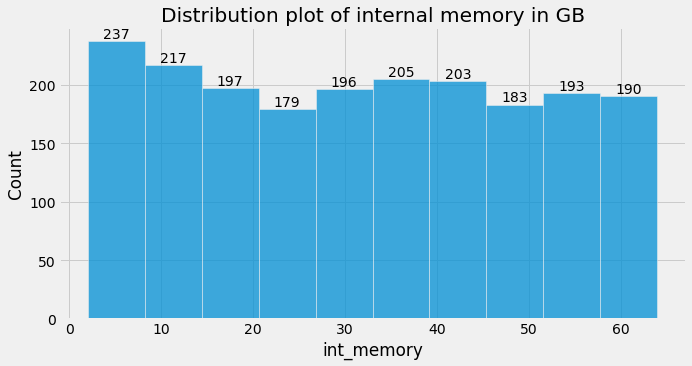

In [16]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['int_memory'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of internal memory in GB')
plt.show()

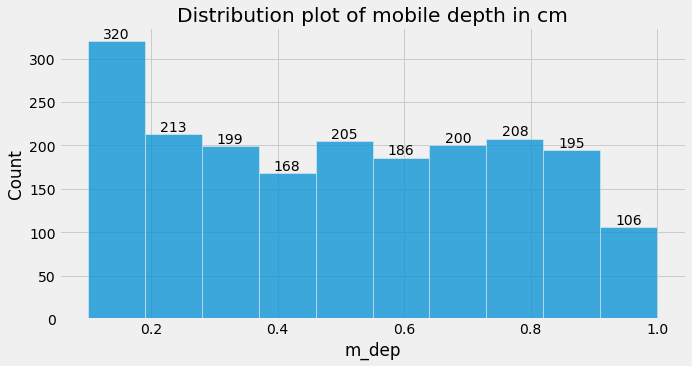

In [17]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['m_dep'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of mobile depth in cm')
plt.show()

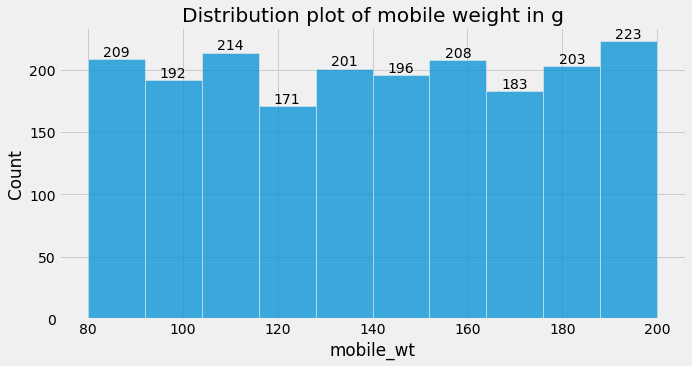

In [18]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['mobile_wt'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of mobile weight in g')
plt.show()

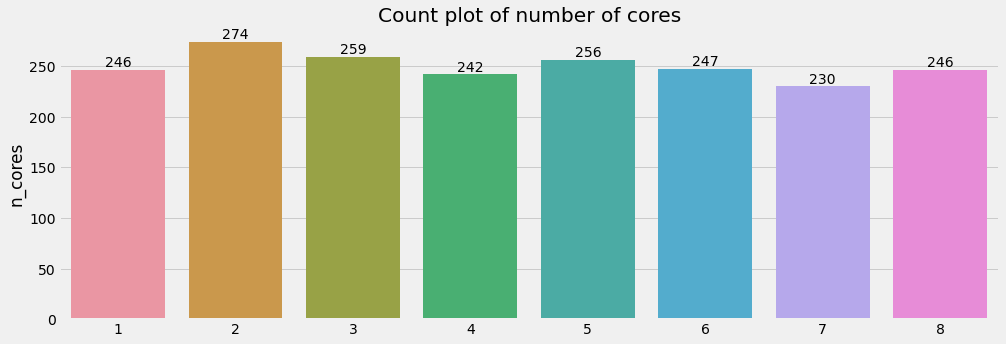

In [19]:
plt.figure(1 , figsize = (15 , 5))
g = sns.barplot(y=train_df['n_cores'].value_counts(), x=train_df['n_cores'].unique())
g.bar_label(g.containers[0])
plt.title('Count plot of number of cores')
plt.show()

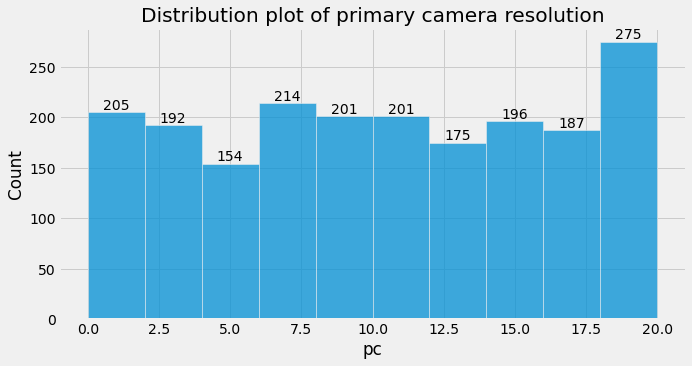

In [20]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['pc'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of primary camera resolution')
plt.show()

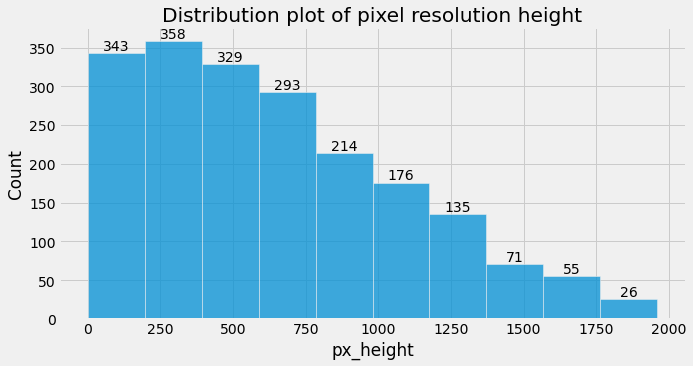

In [21]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['px_height'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of pixel resolution height')
plt.show()

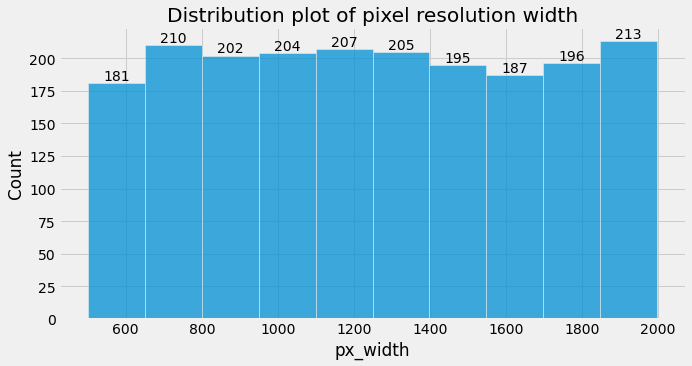

In [22]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['px_width'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of pixel resolution width')
plt.show()

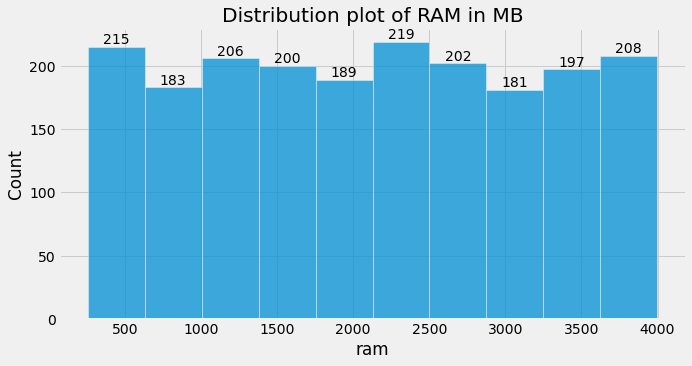

In [23]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['ram'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of RAM in MB')
plt.show()

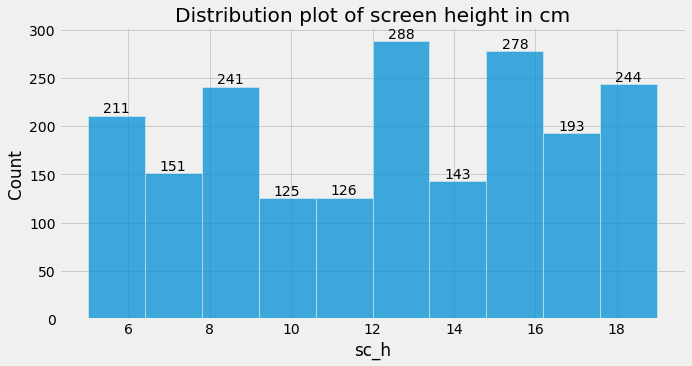

In [24]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['sc_h'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of screen height in cm')
plt.show()

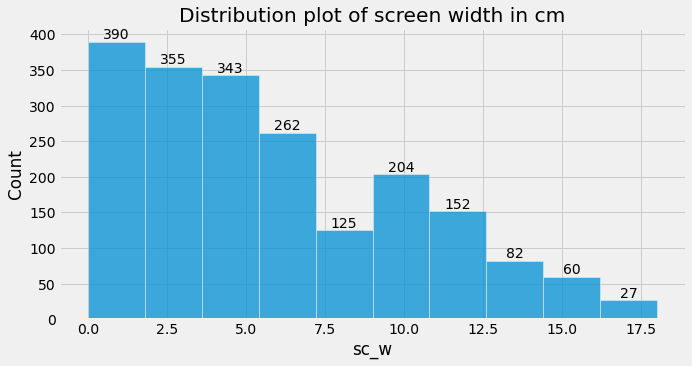

In [25]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['sc_w'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of screen width in cm')
plt.show()

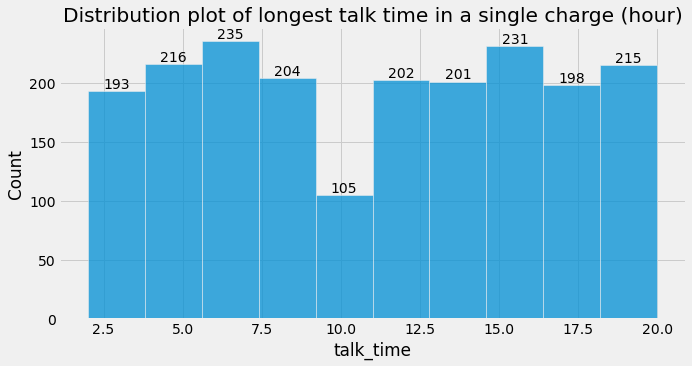

In [26]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(train_df['talk_time'] , bins = 10)
g.bar_label(g.containers[1])
plt.title('Distribution plot of longest talk time in a single charge (hour)')
plt.show()

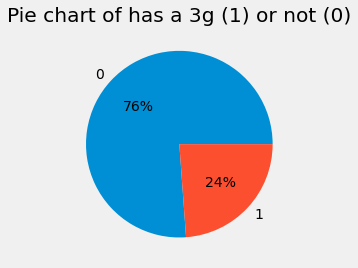

In [27]:
plt.pie(train_df['three_g'].value_counts(), labels=train_df['three_g'].unique(), autopct='%.0f%%')
plt.title('Pie chart of has a 3g (1) or not (0)')
plt.show()

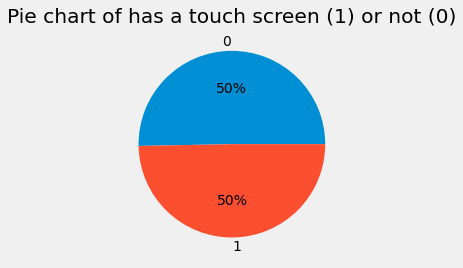

In [28]:
plt.pie(train_df['touch_screen'].value_counts(), labels=train_df['touch_screen'].unique(), autopct='%.0f%%')
plt.title('Pie chart of has a touch screen (1) or not (0)')
plt.show()

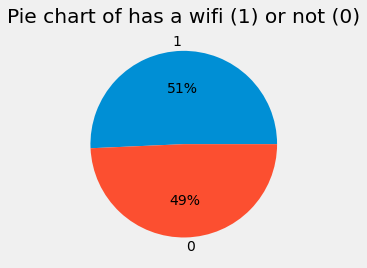

In [29]:
plt.pie(train_df['wifi'].value_counts(), labels=train_df['wifi'].unique(), autopct='%.0f%%')
plt.title('Pie chart of has a wifi (1) or not (0)')
plt.show()

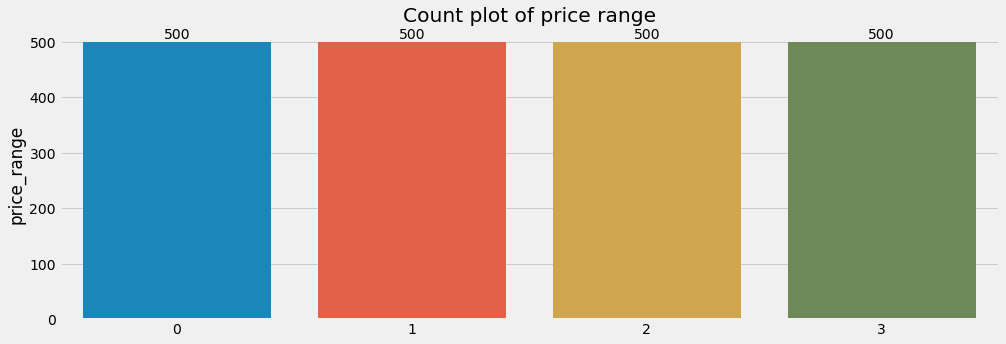

In [30]:
plt.figure(1 , figsize = (15 , 5))
g = sns.barplot(y=train_df['price_range'].value_counts(), x=train_df['price_range'].unique())
g.bar_label(g.containers[0])
plt.title('Count plot of price range')
plt.show()

In [31]:
X = train_df.iloc[:,:-1]
Y = train_df['price_range']

In [202]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [203]:
encoder = OneHotEncoder()

encoded_Y = encoder.fit(Y.values.reshape(-1,1))
encoded_Y = encoded_Y.transform(Y.values.reshape(-1,1)).toarray()

encoded_Y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [204]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# Generate TrainX and TrainY
trainX, testX, trainY, testY = train_test_split(X, encoded_Y, test_size= 1 - train_ratio)
# Genearate ValX, TestX, ValY and TestY
valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))

In [205]:
print(trainX.shape)
print(valX.shape)
print(testX.shape)

(1399, 20)
(300, 20)
(301, 20)


In [206]:
re_transformed_array_trainY = encoder.inverse_transform(trainY)

unique_elements, counts_elements = np.unique(re_transformed_array_trainY, return_counts=True)
unique_elements_and_counts_trainY = pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)
unique_elements_and_counts_trainY.columns = ['unique_elements', 'count']

unique_elements_and_counts_trainY

,unique_elements,count
0,0,349
1,1,355
2,2,344
3,3,351


In [207]:
re_transformed_array_valY = encoder.inverse_transform(valY)

unique_elements, counts_elements = np.unique(re_transformed_array_valY, return_counts=True)
unique_elements_and_counts_valY = pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)
unique_elements_and_counts_valY.columns = ['unique_elements', 'count']

unique_elements_and_counts_valY

,unique_elements,count
0,0,76
1,1,61
2,2,88
3,3,75


In [208]:
re_transformed_array_testY = encoder.inverse_transform(testY)

unique_elements, counts_elements = np.unique(re_transformed_array_testY, return_counts=True)
unique_elements_and_counts_testY = pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)
unique_elements_and_counts_testY.columns = ['unique_elements', 'count']

unique_elements_and_counts_testY

,unique_elements,count
0,0,75
1,1,84
2,2,68
3,3,74


In [209]:
y_part = [trainY, valY, testY]

for y_part in y_part:
    re_transformed_array = encoder.inverse_transform(y_part)

    unique_elements, counts_elements = np.unique(re_transformed_array, return_counts=True)
    unique_elements_and_counts = pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)
    unique_elements_and_counts.columns = ['unique_elements', 'count']
    print('---------------')
    print(unique_elements_and_counts)

---------------
   unique_elements  count
0                0    349
1                1    355
2                2    344
3                3    351
---------------
   unique_elements  count
0                0     76
1                1     61
2                2     88
3                3     75
---------------
   unique_elements  count
0                0     75
1                1     84
2                2     68
3                3     74


In [210]:
list_trainY = unique_elements_and_counts_trainY['unique_elements'].to_list()
list_valY = unique_elements_and_counts_valY['unique_elements'].to_list()
list_testY = unique_elements_and_counts_testY['unique_elements'].to_list()

print(list_trainY)
print(list_valY)
print(list_testY)

[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]


In [211]:
check_val =  all(item in list_valY for item in list_trainY)

if check_val is True:
    print('OK !')
    print("The list_valY contains all elements of the list_trainY.")
else :
    print()
    print('No !')
    print("List_valY doesn't have all elements of the list_trainY.")

OK !
The list_valY contains all elements of the list_trainY.


In [212]:
check_test =  all(item in list_testY for item in list_trainY)

if check_test is True:
    print('OK !')
    print("The list_testY contains all elements of the list_trainY.")
else :
    print()
    print('No !')
    print("List_testY doesn't have all elements of the list_trainY.")

OK !
The list_testY contains all elements of the list_trainY.


In [213]:
checkpoint_no = 'ckpt_1_ANN'
model_name = 'Bird_ANN_2FC_F64_64_epoch_25'

In [214]:
trainY.shape

(1399, 4)

In [215]:
input_shape = trainX.shape[1]

n_batch_size = 20

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
n_validation_steps = int(valX.shape[0] / n_batch_size)
n_test_steps = int(testX.shape[0] / n_batch_size)

n_epochs = 1000

num_classes = trainY.shape[1]

print('Input Shape: ' + str(input_shape))
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()
print('Validation Steps: ' + str(n_validation_steps))
print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))
print()
print('Number of Classes: ' + str(num_classes))

Input Shape: 20
Batch Size: 20

Steps per Epoch: 69

Validation Steps: 15
Test Steps: 15

Number of Epochs: 1000

Number of Classes: 4


In [216]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [217]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1344      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 4)                 260       
                                                                 
Total params: 5,764
Trainable params: 5,764
Non-trainable params: 0
_________________________________________________________________


In [218]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [220]:
# Prepare a directory to store all the checkpoints.
checkpoint_dir = './'+ checkpoint_no
print(checkpoint_dir)
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

./ckpt_1_ANN


In [221]:
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name,
                                   monitor='val_loss', save_best_only=True, mode='auto')]
# early stopping callback
# This callback will stop the training when there is no improvement in
# the validation loss for 10 consecutive epochs.
es = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10,
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

In [222]:
history = model.fit(trainX,
                    trainY,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX, valY),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks, es])

Epoch 1/1000
69/69 [==============================] - 2s 18ms/step - loss: 1.2443 - accuracy: 0.4196 - val_loss: 1.0319 - val_accuracy: 0.5300
Epoch 2/1000
69/69 [==============================] - 1s 10ms/step - loss: 0.8202 - accuracy: 0.6817 - val_loss: 0.6699 - val_accuracy: 0.7667
Epoch 3/1000
69/69 [==============================] - 1s 12ms/step - loss: 0.5480 - accuracy: 0.8129 - val_loss: 0.4918 - val_accuracy: 0.8300
Epoch 4/1000
69/69 [==============================] - 1s 10ms/step - loss: 0.3962 - accuracy: 0.8934 - val_loss: 0.3785 - val_accuracy: 0.8967
Epoch 5/1000
69/69 [==============================] - 1s 12ms/step - loss: 0.3000 - accuracy: 0.9217 - val_loss: 0.3105 - val_accuracy: 0.9133
Epoch 6/1000
69/69 [==============================] - 1s 10ms/step - loss: 0.2331 - accuracy: 0.9427 - val_loss: 0.2595 - val_accuracy: 0.9033
Epoch 7/1000
69/69 [==============================] - 1s 12ms/step - loss: 0.1865 - accuracy: 0.9543 - val_loss: 0.2328 - val_accuracy: 0.9100

In [223]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,1.244273,0.419565,1.031917,0.530000
1,2,0.820183,0.681653,0.669909,0.766667
2,3,0.547993,0.812908,0.491824,0.830000
3,4,0.396177,0.893401,0.378467,0.896667
4,5,0.299975,0.921682,0.310516,0.913333


In [224]:
values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

,epoch,loss,accuracy,val_loss,val_accuracy
14,15,0.052414,0.995649,0.178969,0.916667


In [225]:
class_assignment = dict(zip(Y, encoded_Y))

df_temp = pd.DataFrame([class_assignment], columns=class_assignment.keys())
df_temp = df_temp.stack()
df_temp = pd.DataFrame(df_temp).reset_index().drop(['level_0'], axis=1)
df_temp.columns = ['Category', 'Allocated Number']

df_temp.to_csv(checkpoint_no + '/' + 'class_assignment_df_' + model_name + '.csv')

print('Class assignment:')
class_assignment

Class assignment:


{1: array([0., 1., 0., 0.]),
 2: array([0., 0., 1., 0.]),
 3: array([0., 0., 0., 1.]),
 0: array([1., 0., 0., 0.])}

In [226]:
pk.dump(encoder, open(checkpoint_no + '/' + 'encoder.pkl', 'wb'))

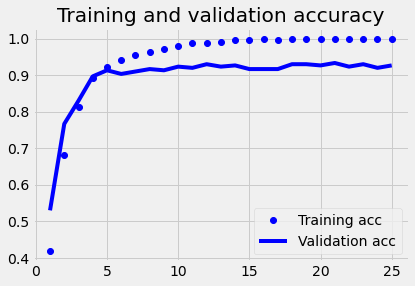

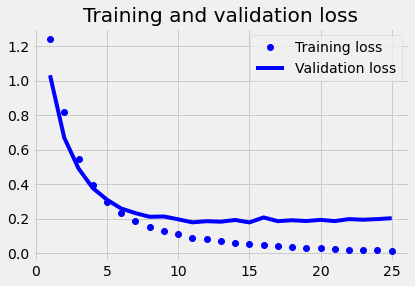

In [227]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [228]:
# Loading the automatically saved model
model_reloaded = load_model(checkpoint_no + '/' + model_name)

# Saving the best model in the correct path and format
root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(checkpoint_dir, model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)

In [229]:
best_model = load_model(model_name_temp)

In [230]:
test_loss, test_acc = best_model.evaluate(testX,
                                          testY,
                                          steps=n_test_steps)
print()
print('Test Accuracy:', test_acc)

15/15 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.8837

Test Accuracy: 0.8837209343910217
